<a href="https://colab.research.google.com/github/hyeeeeeon/Challenge_DongA/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("razanaqvi14/real-and-fake-news")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/razanaqvi14/real-and-fake-news/versions/1


column: title, text, subject, date

In [2]:
import pandas as pd
import os

csv = pd.read_csv(os.path.join(path, "Fake.csv"))
fake_df = pd.DataFrame(csv)

csv = pd.read_csv(os.path.join(path, "True.csv"))
real_df = pd.DataFrame(csv)

In [3]:
# Download latest version
path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

print("Path to dataset files:", path)

csv = pd.read_csv(os.path.join(path, "fake_or_real_news.csv"))

test_df = pd.DataFrame(csv)

100%|██████████| 11.5M/11.5M [00:00<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jillanisofttech/fake-or-real-news/versions/1


# title 단어 빈도 수 비교

In [7]:
import pandas as pd

# 각 파일에서 제목만 불러오기
fake_title = fake_df['title'].dropna()
real_title = real_df['title'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_title['label'] = 'FAKE'
real_title['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

In [8]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_char_count'] = df['title'].apply(lambda x: len(x))

## 단어 수 비교

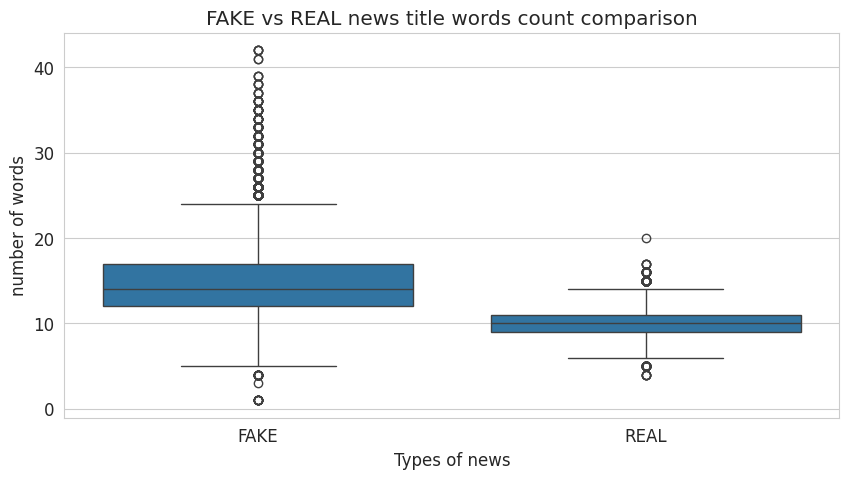

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='title_word_count', data=df)
plt.title("FAKE vs REAL news title words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

## 단어 수 분포 겹치기

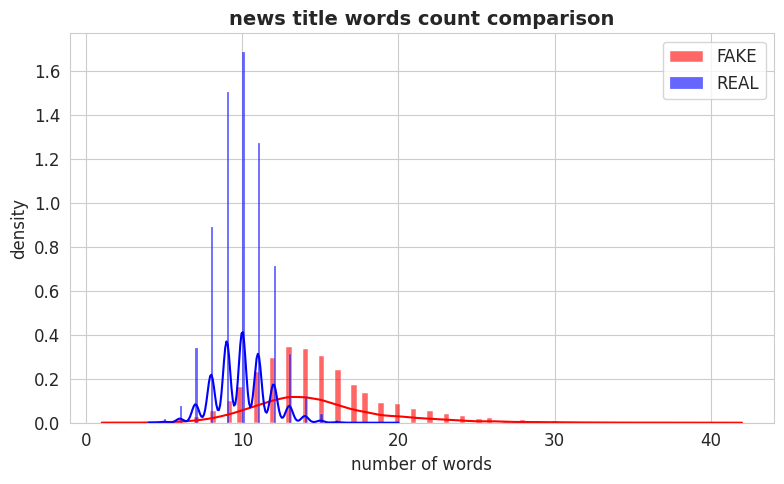

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['title_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['title_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

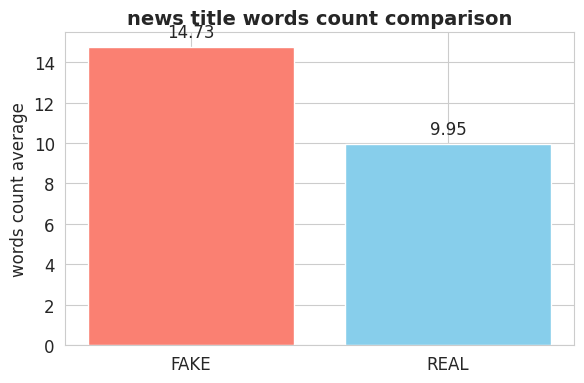

In [14]:
# 평균값 계산
avg_words = df.groupby('label')['title_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['title_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# text 단어 빈도 수 비교

## 단어 수 비교

In [16]:
import pandas as pd

# 각 파일에서 제목만 불러오기
fake_text = fake_df['text'].dropna()
real_text = real_df['text'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_text['label'] = 'FAKE'
real_text['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['text_char_count'] = df['text'].apply(lambda x: len(x))

## 단어 수 분포 겹치기

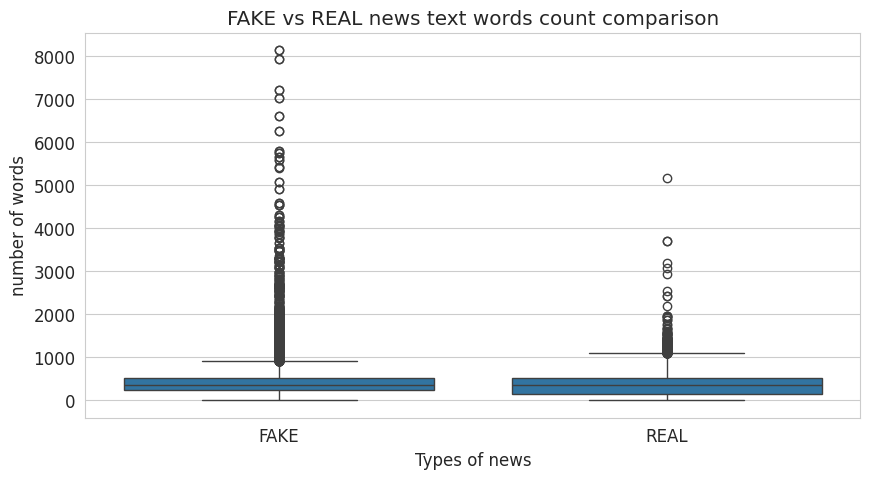

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title("FAKE vs REAL news text words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

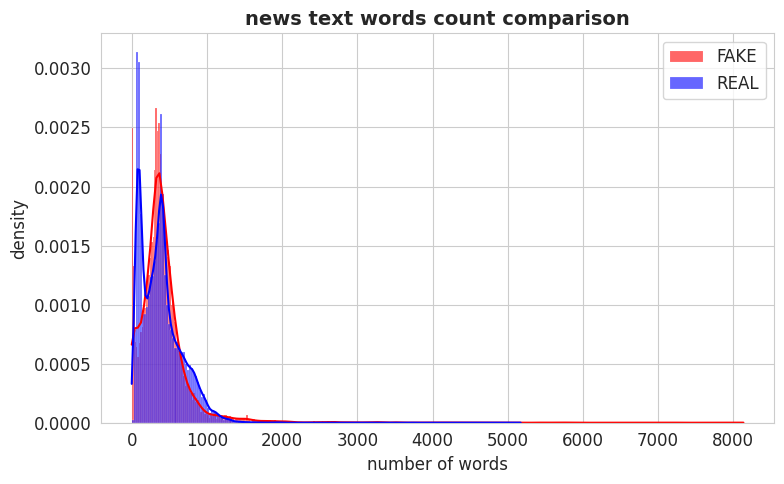

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['text_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['text_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

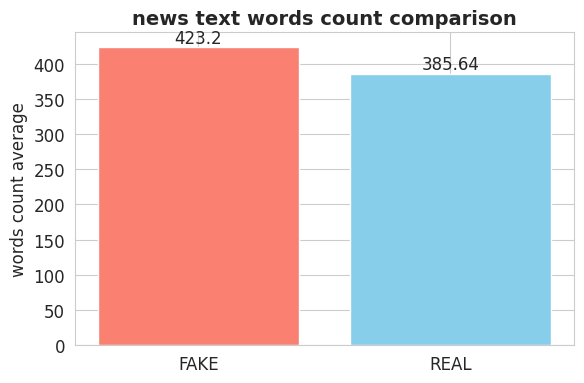

In [19]:
# 평균값 계산
avg_words = df.groupby('label')['text_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['text_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# 감정 단어 분석
: 자극적이거나 클릭을 유도하는 단어 분석

In [22]:
import pandas as pd
from collections import Counter
import re

# 기본 정제 함수
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# 데이터프레임에서 단어 리스트 만들기
def extract_words(df, label):
    words = []
    for title in df[df['label'] == label]['title'].dropna():
        words.extend(clean_and_tokenize(title))
    return words

# 단어 리스트 추출
fake_words = extract_words(df, 'FAKE')
real_words = extract_words(df, 'REAL')

# 빈도수 계산
fake_counts = Counter(fake_words)
real_counts = Counter(real_words)

In [23]:
# FAKE 단어가 REAL보다 몇 배 더 많은지 계산
word_ratio_data = []
for word in fake_counts:
    fake_count = fake_counts[word]
    real_count = real_counts.get(word, 0.5)  # 0이면 0.5로 보정
    ratio = fake_count / real_count
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

# DataFrame으로 정리 (사람이 해석할 수 있도록)
ratio_df = pd.DataFrame(word_ratio_data, columns=['word', 'fake_count', 'real_count', 'fake_to_real_ratio', 'total_count'])

# 최소 등장 기준으로 필터링
filtered_df = ratio_df[ratio_df['total_count'] >= 10].sort_values(by='fake_to_real_ratio', ascending=False)

# 상위 30개만 출력
print("📌 Words that often appear only in the fake news Top 30")
display(filtered_df.head(30))


📌 Words that often appear only in the fake news Top 30


,word,fake_count,real_count,fake_to_real_ratio,total_count
3155,hillarys,418,0.5,836.00000,418.5
5889,wow,372,0.5,744.00000,372.5
349,hilarious,262,0.5,524.00000,262.5
622,heres,245,0.5,490.00000,245.5
18245,boiler,205,0.5,410.00000,205.5
5473,lol,189,0.5,378.00000,189.5
10693,yr,179,0.5,358.00000,179.5
659,busted,179,0.5,358.00000,179.5
18246,ep,171,0.5,342.00000,171.5
2264,bombshell,166,0.5,332.00000,166.5


fake에 많이 나오는 단어 수를 가지고 real에서 얼마나 나오나 비교했는데 real에는 거의 안나오는 경우가 많아 비율이 다 크게 나옴...

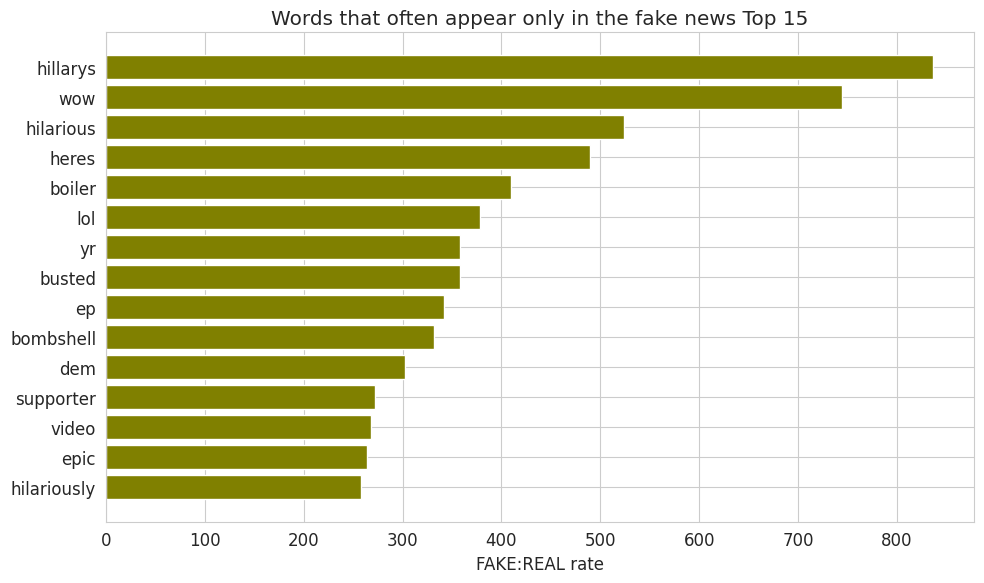

In [27]:
import matplotlib.pyplot as plt

top_words = filtered_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['fake_to_real_ratio'], color='olive')
plt.xlabel("FAKE:REAL rate")
plt.title("Words that often appear only in the fake news Top 15")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


FAKE와 REAL에 모두 등장하는 단어만 비교

In [28]:
# 두쪽에 모두 등장한 단어만 추출
common_words = set(fake_counts.keys()) & set(real_counts.keys())

word_ratio_data = []
for word in common_words:
    fake_count = fake_counts[word]
    real_count = real_counts[word]
    ratio = fake_count / (real_count + 1e-5)  # 보정값 아주 작게
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

In [30]:
# word_ratio_data: [(word, fake_count, real_count, ratio, total), ...]
common_df = pd.DataFrame(
    word_ratio_data,
    columns=["word", "fake_count", "real_count", "fake_to_real_ratio", "total_count"]
)

# 분석을 명확하게 하기 위해 최소 등장 횟수 필터링 (예: 5회 이상)
common_df = common_df[common_df['total_count'] >= 5]

# 비율 기준 정렬
common_df = common_df.sort_values(by='fake_to_real_ratio', ascending=False)


<ipython-input-34-f6d6078cfd19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')


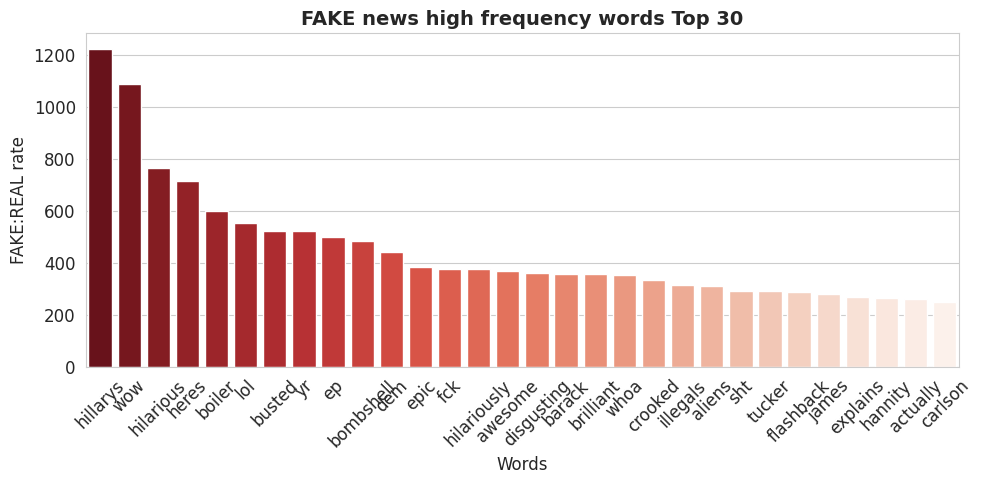

In [34]:
# 상위 30개 단어 시각화
top_words = common_df.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')
plt.title("FAKE news high frequency words Top 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("FAKE:REAL rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


비율이 아니라 "비율 차이"가 큰 단어를 정규화해서 추출

In [29]:
# 전체 단어 수
total_fake_words = sum(fake_counts.values())
total_real_words = sum(real_counts.values())

# 정규화된 비율 비교
word_ratio_data = []
for word in set(fake_counts.keys()) | set(real_counts.keys()):
    fake_freq = fake_counts[word] / total_fake_words
    real_freq = real_counts.get(word, 0) / total_real_words
    ratio = fake_freq / (real_freq + 1e-6)  # 비율 대비
    total = fake_counts[word] + real_counts.get(word, 0)
    word_ratio_data.append((word, fake_counts[word], real_counts.get(word, 0), ratio, total))


In [33]:
# 리스트 → DataFrame 변환
norm_df = pd.DataFrame(
    word_ratio_data,
    columns=['word', 'fake_count', 'real_count', 'normalized_fake_to_real_ratio', 'total_count']
)

# 필터링: 너무 적게 등장한 단어 제외 (예: 총 5회 이상 등장)
norm_df = norm_df[norm_df['total_count'] >= 5]

# 정렬: 비율이 높은 순
norm_df = norm_df.sort_values(by='normalized_fake_to_real_ratio', ascending=False)


<ipython-input-35-507ed5100b51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')


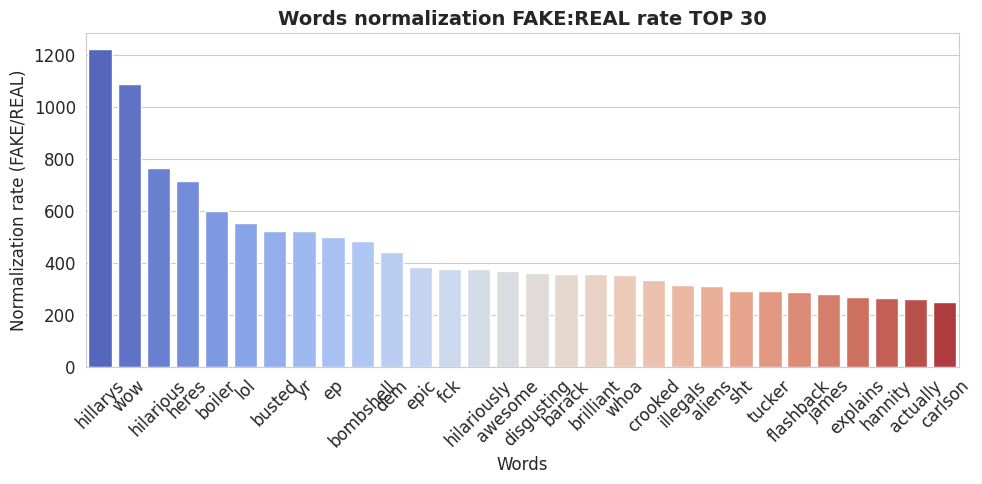

In [35]:
# 상위 30개 단어 선택
top_norm = norm_df.head(30)

# 막대그래프 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')

plt.title("Words normalization FAKE:REAL rate TOP 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Normalization rate (FAKE/REAL)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


이렇게 해도 둘 다 비슷하게 단어 사용이 되어서 처음부터 타이틀 감정 분석을 해보기로 함

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 처음 한 번만 실행 필요
nltk.download('vader_lexicon')

# 감성 분석기 객체 생성
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [37]:
# 뉴스 제목 감성 점수 계산 (compound: 종합 감정 점수)
df['sentiment_score'] = df['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# 감성 점수 해석 (선택사항: 범주화)
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


<ipython-input-38-786b99bdef0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})


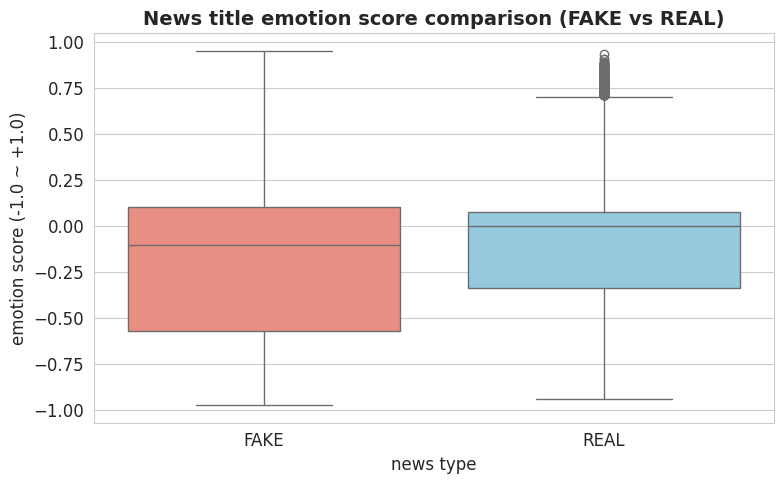

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("news type", fontsize=12)
plt.ylabel("emotion score (-1.0 ~ +1.0)", fontsize=12)
plt.tight_layout()
plt.show()

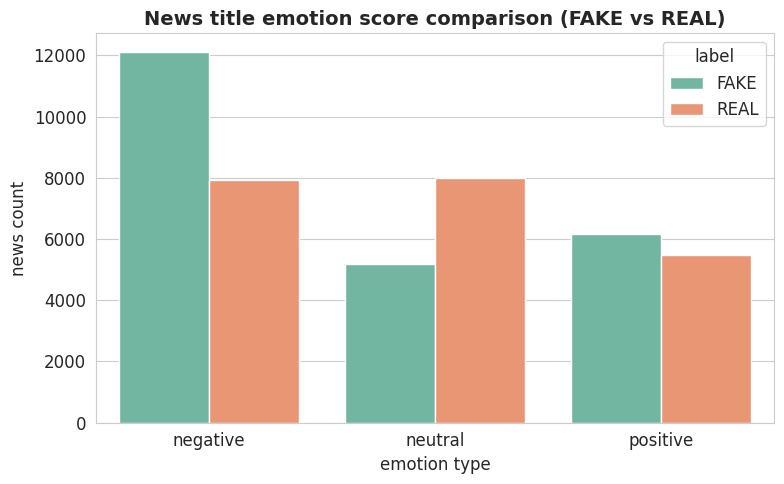

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', hue='label', palette='Set2')
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("emotion type", fontsize=12)
plt.ylabel("news count", fontsize=12)
plt.tight_layout()
plt.show()